<a href="https://colab.research.google.com/github/AaryanRankhamb/Codsoft/blob/main/Customer_Churn_Prediction(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

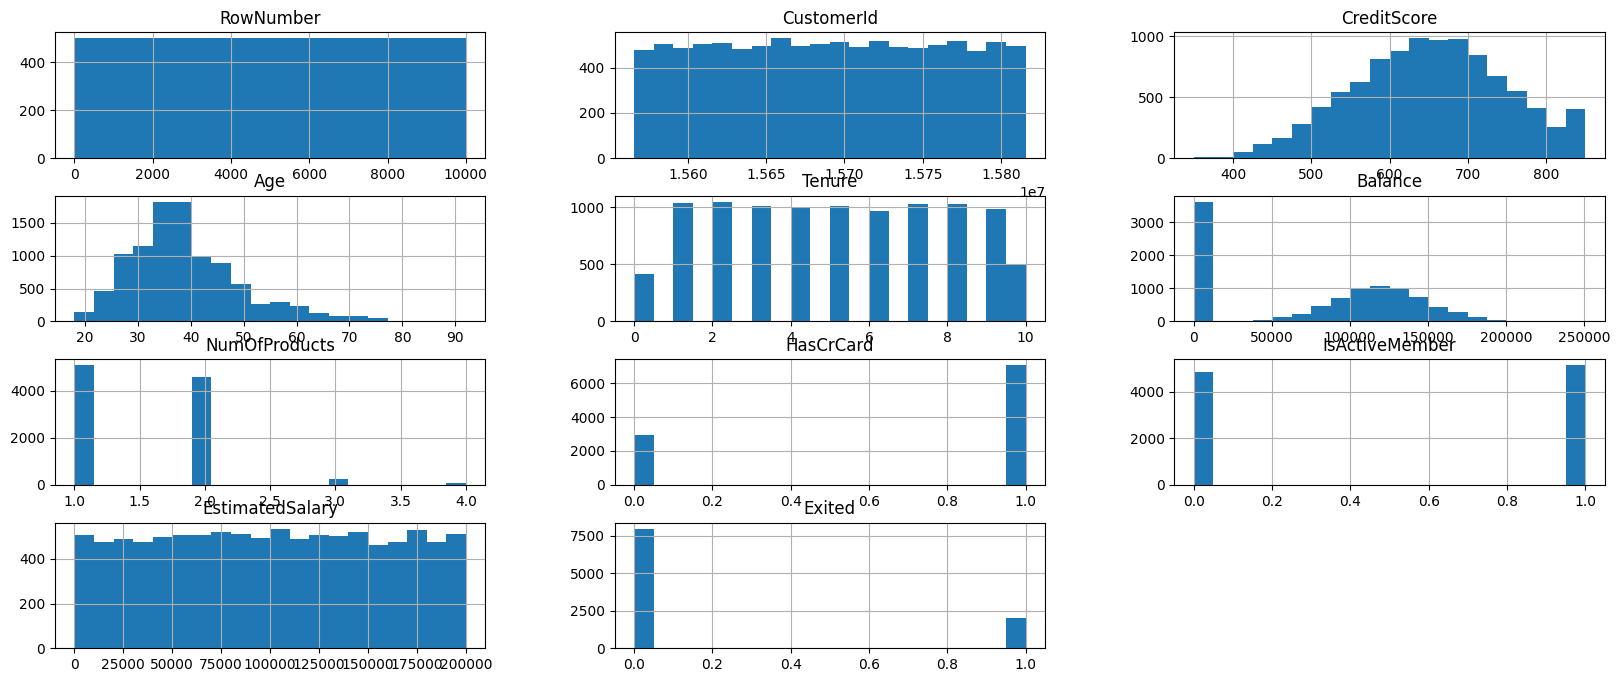

In [7]:
df.hist(bins=20, figsize=(20,8))
#looking at feature distributions

In [8]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

In [9]:
df["Age"] = df["Age"].apply(lambda x:np.log(x))
# apply log transformation to convert this feature to gaussian distribution

<Axes: >

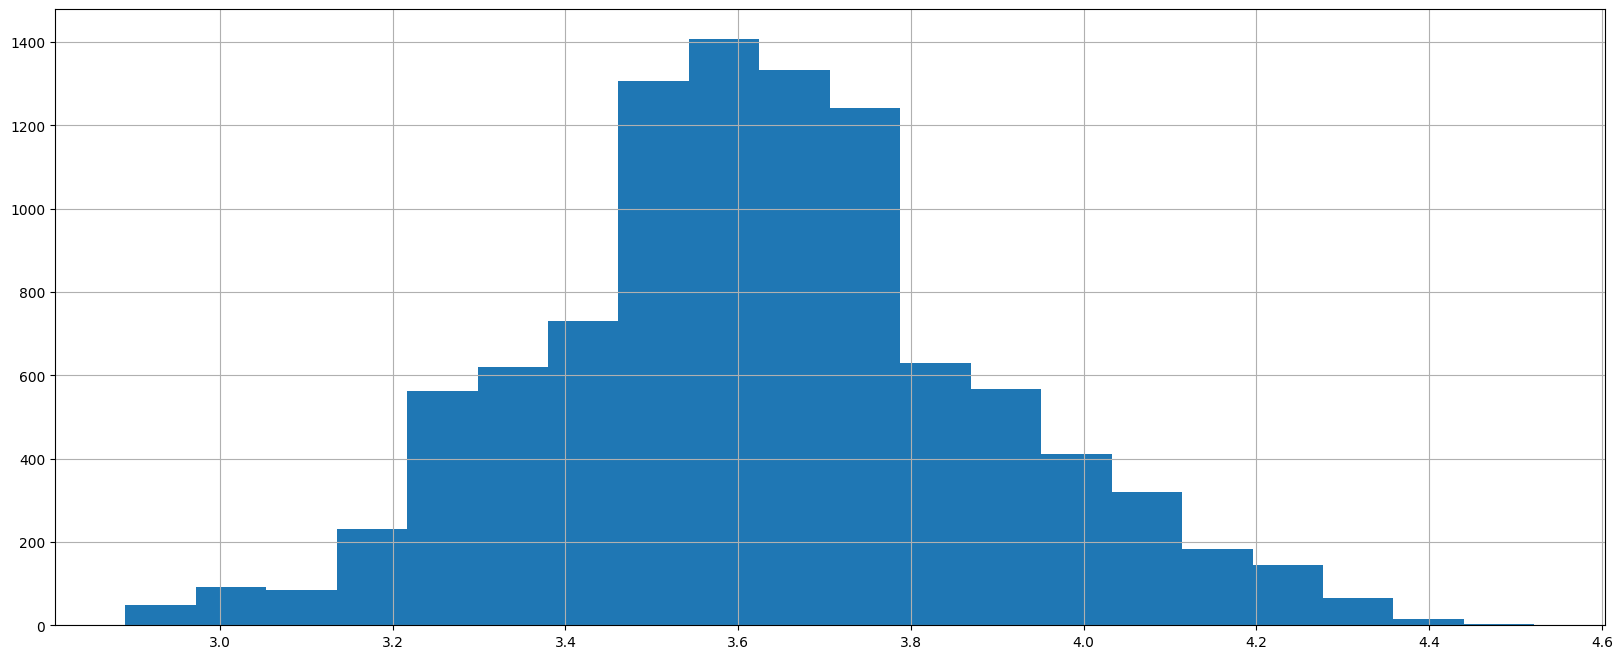

In [10]:
df["Age"].hist(bins=20, figsize=(20,8))

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,3.663562,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,3.761200,2,125510.82,1,1,1,79084.10,0


In [12]:
print(df["CustomerId"].nunique())
print(df["Surname"].nunique())
print(df["NumOfProducts"].nunique())
print(df["CustomerId"].nunique())
cat_feat = ["NumOfProducts", "HasCrCard", "IsActiveMember", "Gender", "Geography"]

10000
2932
4
10000


In [13]:
# drop redundant columns
df2 = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [14]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,3.663562,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,3.761200,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,3.555348,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,3.583519,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,3.737670,3,75075.31,2,1,0,92888.52,1


In [15]:

enc_df = pd.get_dummies(data=df2, columns=cat_feat, drop_first=True)

In [16]:
enc_df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Gender_Male,Geography_Germany,Geography_Spain
0,619,3.737670,2,0.00,101348.88,1,0,0,0,1,1,0,0,0
1,608,3.713572,1,83807.86,112542.58,0,0,0,0,0,1,0,0,1
2,502,3.737670,8,159660.80,113931.57,1,0,1,0,1,0,0,0,0
3,699,3.663562,1,0.00,93826.63,0,1,0,0,0,0,0,0,0
4,850,3.761200,2,125510.82,79084.10,0,0,0,0,1,1,0,0,1


In [17]:
label_col = enc_df["Exited"]
enc_df.drop("Exited", axis=1, inplace=True)
enc_df["Label"] = label_col

In [18]:
enc_df

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Gender_Male,Geography_Germany,Geography_Spain,Label
0,619,3.737670,2,0.00,101348.88,0,0,0,1,1,0,0,0,1
1,608,3.713572,1,83807.86,112542.58,0,0,0,0,1,0,0,1,0
2,502,3.737670,8,159660.80,113931.57,0,1,0,1,0,0,0,0,1
3,699,3.663562,1,0.00,93826.63,1,0,0,0,0,0,0,0,0
4,850,3.761200,2,125510.82,79084.10,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3.663562,5,0.00,96270.64,1,0,0,1,0,1,0,0,0
9996,516,3.555348,10,57369.61,101699.77,0,0,0,1,1,1,0,0,0
9997,709,3.583519,7,0.00,42085.58,0,0,0,0,1,0,0,0,1
9998,772,3.737670,3,75075.31,92888.52,1,0,0,1,0,1,1,0,1


In [19]:
enc_df["Label"].value_counts()
# class imbalance is present

0    7963
1    2037
Name: Label, dtype: int64

In [21]:
cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
for col in cols:
  enc_df[col] = enc_df[col].apply(lambda x:(x-np.mean(enc_df[col]))/(np.std(enc_df[col])+0.001))


In [22]:
enc_df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Gender_Male,Geography_Germany,Geography_Spain,Label
0,-0.326218,0.424241,-1.041400,-1.225848,0.021886,0,0,0,1,1,0,0,0,1
1,-0.440031,0.331339,-1.387058,0.117350,0.216534,0,0,0,0,1,0,0,1,0
2,-1.536778,0.424241,1.032551,1.333053,0.240687,0,1,0,1,0,0,0,0,1
3,0.501515,0.138536,-1.387058,-1.225848,-0.108918,1,0,0,0,0,0,0,0,0
4,2.063862,0.514957,-1.041400,0.785728,-0.365276,0,0,0,1,1,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    enc_df,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=enc_df["Label"]
)

In [29]:
from imblearn.over_sampling import SMOTE
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
resample = SMOTE(random_state=42)
X_train_re, y_train_re = resample.fit_resample(X_train, y_train)

In [34]:
y_train_re.value_counts()
# class imbalance fixed

1    6370
0    6370
Name: Label, dtype: int64

In [43]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_re, y_train_re)

SVC()

In [44]:
X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)),
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1593
           1       0.47      0.71      0.56       407

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000

[[1268  325]
 [ 119  288]]


In [46]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.74      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [47]:
clf3 = SVC(kernel="poly")
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.84      0.33      0.47       407

    accuracy                           0.85      2000
   macro avg       0.85      0.66      0.69      2000
weighted avg       0.85      0.85      0.82      2000

